# ### PISA Project Nathaniel Cekay

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df_test = pd.read_csv("pisa2009test.csv")
df_train = pd.read_csv("pisa2009train.csv")

In [3]:
df_test.info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  1570 non-null   int64  
 1   male                   1570 non-null   int64  
 2   raceeth                1557 non-null   object 
 3   preschool              1549 non-null   float64
 4   expectBachelors        1547 non-null   float64
 5   motherHS               1525 non-null   float64
 6   motherBachelors        1382 non-null   float64
 7   motherWork             1534 non-null   float64
 8   fatherHS               1445 non-null   float64
 9   fatherBachelors        1282 non-null   float64
 10  fatherWork             1457 non-null   float64
 11  selfBornUS             1546 non-null   float64
 12  motherBornUS           1547 non-null   float64
 13  fatherBornUS           1512 non-null   float64
 14  englishAtHome          1543 non-null   float64
 15  comp

# ### I chose to remove the raceeth column, as studying racial demographics on this type of study would essentially be racial profiling, without taking into factor a variety of different factors that might play into students performance, such as parent's income, where the student lived, were the parents divorced, ect. 

In [4]:
df_train = df_train.drop('raceeth', axis=1)

In [5]:
df_test = df_test.drop('raceeth', axis=1)

In [6]:
missing = df_train.isna().sum()

print(missing)

grade                      0
male                       0
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  3663 non-null   int64  
 1   male                   3663 non-null   int64  
 2   preschool              3607 non-null   float64
 3   expectBachelors        3601 non-null   float64
 4   motherHS               3566 non-null   float64
 5   motherBachelors        3266 non-null   float64
 6   motherWork             3570 non-null   float64
 7   fatherHS               3418 non-null   float64
 8   fatherBachelors        3094 non-null   float64
 9   fatherWork             3430 non-null   float64
 10  selfBornUS             3594 non-null   float64
 11  motherBornUS           3592 non-null   float64
 12  fatherBornUS           3550 non-null   float64
 13  englishAtHome          3592 non-null   float64
 14  computerForSchoolwork  3598 non-null   float64
 15  read

In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
grade,3663.0,10.089817,0.554375,8.00,10.000,10.00,10.00,12.0
male,3663.0,0.511057,0.499946,0.00,0.000,1.00,1.00,1.0
preschool,3607.0,0.722761,0.447697,0.00,0.000,1.00,1.00,1.0
expectBachelors,3601.0,0.785893,0.410259,0.00,1.000,1.00,1.00,1.0
motherHS,3566.0,0.879978,0.325033,0.00,1.000,1.00,1.00,1.0
motherBachelors,3266.0,0.348132,0.476451,0.00,0.000,0.00,1.00,1.0
motherWork,3570.0,0.734454,0.441685,0.00,0.000,1.00,1.00,1.0
fatherHS,3418.0,0.859274,0.347789,0.00,1.000,1.00,1.00,1.0
fatherBachelors,3094.0,0.331933,0.470983,0.00,0.000,0.00,1.00,1.0
fatherWork,3430.0,0.853061,0.354096,0.00,1.000,1.00,1.00,1.0


In [9]:
df_train['preschool'] = df_train['preschool'].fillna("unknown")

In [10]:
df_train['expectBachelors'] = df_train['expectBachelors'].fillna("unknown")

In [11]:
df_train['motherHS'] = df_train['motherHS'].fillna("unknown")

In [12]:
df_train['motherBachelors'] = df_train['motherBachelors'].fillna("unknown")

In [13]:
df_train['motherWork'] = df_train['motherWork'].fillna("unknown")

In [14]:
df_train['fatherHS'] = df_train['fatherHS'].fillna("unknown")

In [15]:
df_train['fatherBachelors'] = df_train['fatherBachelors'].fillna("unknown")

In [16]:
df_train['motherBornUS'] = df_train['motherBornUS'].fillna("unknown")

In [17]:
df_train['fatherBornUS'] = df_train['fatherBornUS'].fillna("unknown")

In [18]:
df_train['englishAtHome'] = df_train['englishAtHome'].fillna("unknown")

In [19]:
df_train['computerForSchoolwork'] = df_train['computerForSchoolwork'].fillna("unknown")

In [20]:
df_train['read30MinsADay'] = df_train['read30MinsADay'].fillna("unknown")

In [21]:
df_train['schoolHasLibrary'] = df_train['schoolHasLibrary'].fillna("unknown")

In [22]:
df_train['fatherWork'] = df_train['fatherWork'].fillna("unknown")

In [23]:
df_train['selfBornUS'] = df_train['selfBornUS'].fillna("unknown")

In [24]:
df_train['readingScore'] = df_train['readingScore'].fillna(df_train['readingScore'].mean())

In [25]:
df_train['schoolSize'] = df_train['schoolSize'].fillna(df_train['schoolSize'].mean())

In [26]:
df_train['studentsInEnglish'] = df_train['studentsInEnglish'].fillna(df_train['studentsInEnglish'].mean())

In [27]:
df_train['minutesPerWeekEnglish'] = df_train['minutesPerWeekEnglish'].fillna(df_train['minutesPerWeekEnglish'].mean())

In [28]:
df_test['readingScore'] = df_test['readingScore'].fillna(df_test['readingScore'].mean())

In [29]:
df_test['schoolSize'] = df_test['schoolSize'].fillna(df_test['schoolSize'].mean())

In [30]:
df_test['studentsInEnglish'] = df_test['studentsInEnglish'].fillna(df_test['studentsInEnglish'].mean())

In [31]:
df_test['minutesPerWeekEnglish'] = df_test['minutesPerWeekEnglish'].fillna(df_test['minutesPerWeekEnglish'].mean())

In [32]:
missing = df_train.isna().sum()

print(missing)

grade                    0
male                     0
preschool                0
expectBachelors          0
motherHS                 0
motherBachelors          0
motherWork               0
fatherHS                 0
fatherBachelors          0
fatherWork               0
selfBornUS               0
motherBornUS             0
fatherBornUS             0
englishAtHome            0
computerForSchoolwork    0
read30MinsADay           0
minutesPerWeekEnglish    0
studentsInEnglish        0
schoolHasLibrary         0
publicSchool             0
urban                    0
schoolSize               0
readingScore             0
dtype: int64


In [33]:
correlation_readingScore_df_train = df_train.corrwith(df_train['readingScore']).drop('readingScore')
correlation_readingScore_desc_df_train = correlation_readingScore_df_train.sort_values(ascending=False)
print(correlation_readingScore_desc_df_train)

grade                    0.286752
minutesPerWeekEnglish    0.064381
studentsInEnglish        0.032471
schoolSize               0.026240
urban                   -0.064194
publicSchool            -0.133654
male                    -0.153928
dtype: float64


# ### I took several steps to cleanse the data. I replaced missing values with "unknown" in categorical columns. For numerical columns, I imputed the missing values with the mean. 

# #2 Descriptive Statistics

In [34]:
print("\n Mean")
print(df_train.mean())
print("\n Median")
print(df_train.median())
print("\n Mode")
print(df_train.mode())


 Mean
grade                      10.089817
male                        0.511057
minutesPerWeekEnglish     266.208225
studentsInEnglish          24.499414
publicSchool                0.933934
urban                       0.384930
schoolSize               1369.316767
readingScore              497.911403
dtype: float64

 Median
grade                      10.00
male                        1.00
minutesPerWeekEnglish     250.00
studentsInEnglish          25.00
publicSchool                1.00
urban                       0.00
schoolSize               1276.00
readingScore              499.66
dtype: float64

 Mode
   grade  male preschool expectBachelors motherHS motherBachelors motherWork  \
0     10     1       1.0             1.0      1.0             0.0        1.0   

  fatherHS fatherBachelors fatherWork  ... englishAtHome  \
0      1.0             0.0        1.0  ...           1.0   

  computerForSchoolwork read30MinsADay minutesPerWeekEnglish  \
0                   1.0            0.0   

C:\Users\cekay\AppData\Local\Temp\ipykernel_9488\3059008765.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_train.mean())
C:\Users\cekay\AppData\Local\Temp\ipykernel_9488\3059008765.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_train.median())


In [35]:
print("\n Var")
print(df_train.var())
print("\n STD")
print(df_train.std())


 Var
grade                         0.307332
male                          0.249946
minutesPerWeekEnglish     20904.985048
studentsInEnglish            48.105270
publicSchool                  0.061718
urban                         0.236824
schoolSize               723388.921820
readingScore               9123.144498
dtype: float64

 STD
grade                      0.554375
male                       0.499946
minutesPerWeekEnglish    144.585563
studentsInEnglish          6.935796
publicSchool               0.248431
urban                      0.486645
schoolSize               850.522734
readingScore              95.515153
dtype: float64


C:\Users\cekay\AppData\Local\Temp\ipykernel_9488\1750625987.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_train.var())
C:\Users\cekay\AppData\Local\Temp\ipykernel_9488\1750625987.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_train.std())


In [36]:
print("\n Skewness")
print(df_train.skew())
print("\n Kurtosis")
print(df_train.kurt())


 Skewness
grade                    0.037031
male                    -0.044255
minutesPerWeekEnglish    3.860899
studentsInEnglish        0.902921
publicSchool            -3.495298
urban                    0.473168
schoolSize               1.132716
readingScore            -0.125880
dtype: float64

 Kurtosis
grade                     0.437794
male                     -1.999133
minutesPerWeekEnglish    33.862597
studentsInEnglish         6.280920
publicSchool             10.222689
urban                    -1.777083
schoolSize                2.979588
readingScore             -0.331760
dtype: float64


C:\Users\cekay\AppData\Local\Temp\ipykernel_9488\1896753090.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_train.skew())
C:\Users\cekay\AppData\Local\Temp\ipykernel_9488\1896753090.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_train.kurt())


# ### The skew and kurtosis scores tell us that we would want to adjust columns to create a more normal distribution, particularly minutesPerWeekEnglish

# #3 Data Visualization

<AxesSubplot:xlabel='schoolSize'>

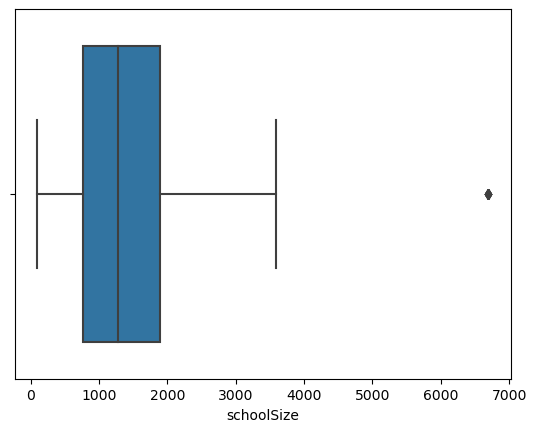

In [37]:
sns.boxplot(x='schoolSize', data=df_train)

<AxesSubplot:xlabel='minutesPerWeekEnglish'>

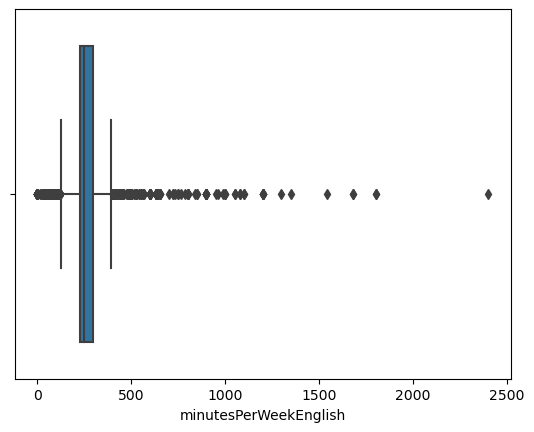

In [38]:
sns.boxplot(x='minutesPerWeekEnglish', data=df_train)

# ### There appear to be outliers in some of these columns, which we would want to remove in order to get into an in-depth machine learning project.

<AxesSubplot:xlabel='readingScore'>

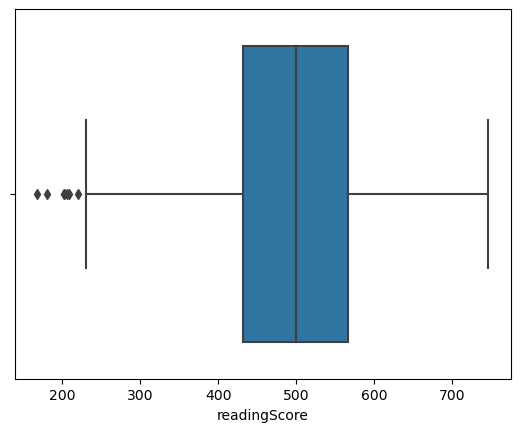

In [39]:
sns.boxplot(x='readingScore', data=df_train)

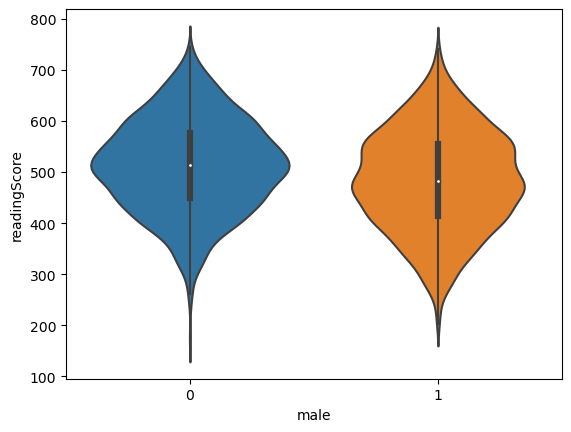

In [40]:
sns.violinplot(x='male', y='readingScore', data=df_train)
plt.show()

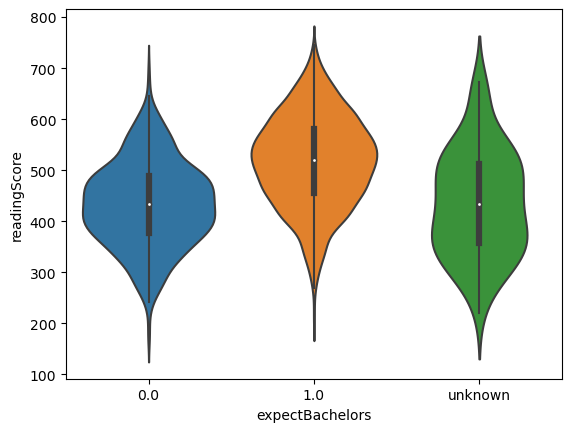

In [41]:
sns.violinplot(x='expectBachelors', y='readingScore', data=df_train)
plt.show()

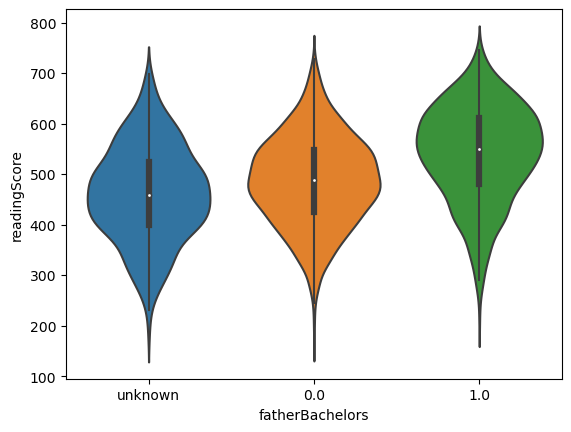

In [42]:
sns.violinplot(x='fatherBachelors', y='readingScore', data=df_train)
plt.show()

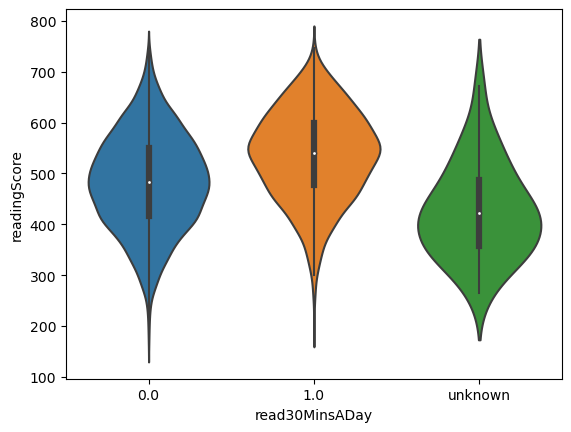

In [43]:
sns.violinplot(x='read30MinsADay', y='readingScore', data=df_train)
plt.show()

# #4 Checking Hypotheses

# ### Are there differences between Urban and non-urban schools?

In [44]:
df_urban = df_train[df_train['urban'] == 1]
df_rural = df_train[df_train['urban'] == 0]

In [45]:
from scipy.stats import ttest_ind

In [46]:
t_stats, p_value = ttest_ind(df_urban['readingScore'], df_rural['readingScore'])
print("readingScore")
print(f'T-Statistics: {t_stats}, p-Value: {p_value}')

t_stats, p_value = ttest_ind(df_urban['minutesPerWeekEnglish'], df_rural['minutesPerWeekEnglish'])
print("minutesPerWeekEnglish")
print(f'T-Statistics: {t_stats}, p-Value: {p_value}')


t_stats, p_value = ttest_ind(df_urban['schoolSize'], df_rural['schoolSize'])
print("schoolSize")
print(f'T-Statistics: {t_stats}, p-Value: {p_value}')

readingScore
T-Statistics: -3.8921423943278786, p-Value: 0.00010113205967454483
minutesPerWeekEnglish
T-Statistics: -3.022423232922819, p-Value: 0.002524959491172344
schoolSize
T-Statistics: 20.2712547163588, p-Value: 1.1172353889459241e-86


# ### We find a significant difference in p-value for urban and non-urban schools, with urban schools having a significantly different readingScore and minutesPerWeekEnglish 

In [47]:
from scipy.stats import f_oneway

In [48]:
anova = f_oneway(df_urban['readingScore'], df_rural['readingScore'])

print(f"anova results: f-statistic {anova.statistic}, p-value {anova.pvalue}")

anova results: f-statistic 15.148772417724379, p-value 0.00010113205967452168


# ### The anova results have confirmed that there is a significant evidence against the null hypotheses, there is reason to believe whether or not they student goes to an Urban school is a significant predictor of reading score 

# #5 Regression Analysis

In [49]:
df_encoded = pd.get_dummies(df_train, columns=['urban', 'fatherBachelors'], drop_first=True)

In [50]:
y = df_encoded['readingScore']
X = df_encoded[['urban_1','schoolSize', 'minutesPerWeekEnglish', 'fatherBachelors_1.0']]

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.20, random_state=0)

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
lin_model = model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)


r2 = model.score(X_test, y_test)
print("r-squared", r2)
print("intercept", model.intercept_)
print("coefficient", model.coef_)

import scipy.stats as st 

st.t.interval(alpha=0.99, 
              df=len(model.coef_)-1, 
              loc=np.mean(model.coef_),  
              scale=st.sem(model.coef_)) 

r-squared 0.047564701766881434
intercept 498.69840273037545
coefficient [-6.61043614  5.35565171  7.09892683 26.76836387]


C:\Users\cekay\AppData\Local\Temp\ipykernel_9488\706109365.py:16: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.99,


(-32.22339723801194, 48.52965037280205)

# ### Summary and #6 Confidence Intervals


# ### The lower r-squared score indicates the model could be improved by testing different regression methods and other things to improve the model, especially if looking to make a model that creates efficable predictions. Looking at the coefficient suggests the negative relationship between living in an urban environment and reading scores. There is also a strong positive relationship between students with fathers who had a bachelor's degree and reading score. 

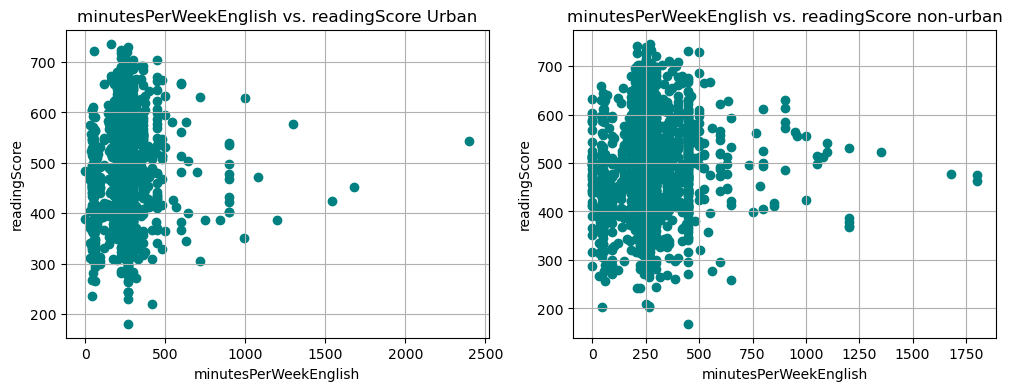

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].scatter(df_urban['minutesPerWeekEnglish'], df_urban['readingScore'], color='teal')
axs[0].set_title('minutesPerWeekEnglish vs. readingScore Urban')
axs[0].set_xlabel('minutesPerWeekEnglish')
axs[0].set_ylabel('readingScore')
axs[0].grid(True)

axs[1].scatter(df_rural['minutesPerWeekEnglish'], df_rural['readingScore'], color='teal')
axs[1].set_title('minutesPerWeekEnglish vs. readingScore non-urban')
axs[1].set_xlabel('minutesPerWeekEnglish')
axs[1].set_ylabel('readingScore')
axs[1].grid(True)

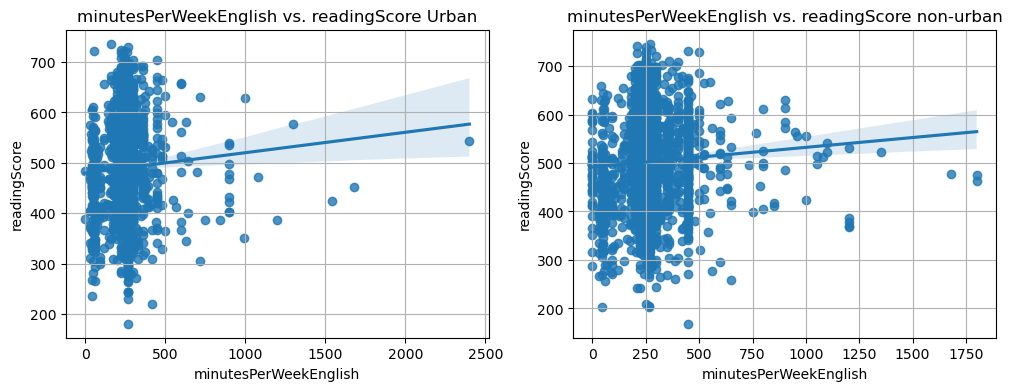

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.regplot(x='minutesPerWeekEnglish', y='readingScore', data=df_urban, scatter=True, ax=axs[0])
axs[0].set_title('minutesPerWeekEnglish vs. readingScore Urban')
axs[0].set_xlabel('minutesPerWeekEnglish')
axs[0].set_ylabel('readingScore')
axs[0].grid(True)

sns.regplot(x='minutesPerWeekEnglish', y='readingScore', data=df_rural, scatter=True, ax=axs[1])
axs[1].set_title('minutesPerWeekEnglish vs. readingScore non-urban')
axs[1].set_xlabel('minutesPerWeekEnglish')
axs[1].set_ylabel('readingScore')
axs[1].grid(True)

(0.0, 200.0)

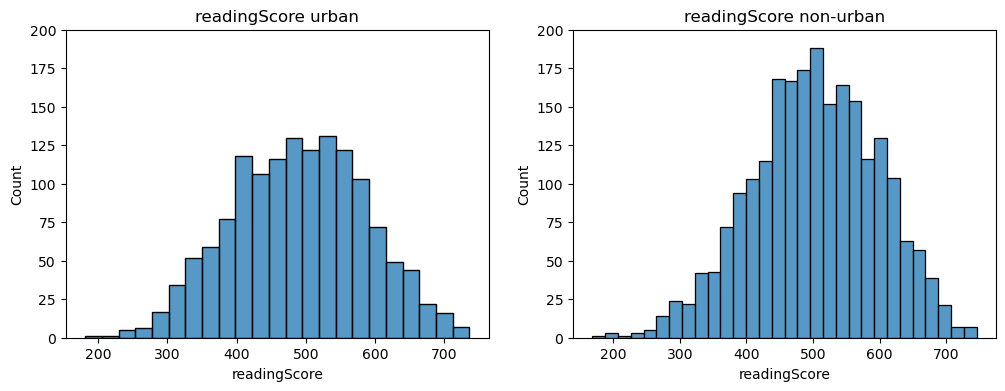

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df_urban['readingScore'], ax=axs[0])
axs[0].set_title('readingScore urban')
axs[0].set_ylim(0, 200) 

sns.histplot(df_rural['readingScore'], ax=axs[1])
axs[1].set_title('readingScore non-urban')
axs[1].set_ylim(0, 200) 

# ### Looking at the side by side, we an see the reading score is lower in Urban areas than in non-urban areas

In [57]:
import scipy.stats as stats 

mean = df_urban['readingScore'].mean()
std = stats.sem(df_urban['readingScore'])
ci = stats.t.interval(0.95, len(df_urban['readingScore']) - 1, loc=mean, scale=std)

print(f"the 95% confidence intervial of mean reading score Urban: {ci}")

the 95% confidence intervial of mean reading score Urban: (485.118512845203, 495.20520346685225)


In [58]:
mean = df_rural['readingScore'].mean()
std = stats.sem(df_rural['readingScore'])
ci = stats.t.interval(0.95, len(df_urban['readingScore']) - 1, loc=mean, scale=std)

print(f"the 95% confidence intervial of mean reading score non-urban: {ci}")

the 95% confidence intervial of mean reading score non-urban: (498.8530849741384, 506.66955151054987)


# ### The starkly different ranges of confidence intervals of urban and non-urban indicate that reading scores in these areas are most likely statistically significantly different 

Text(0.5, 1.0, 'readingScore vs gender non-urban')

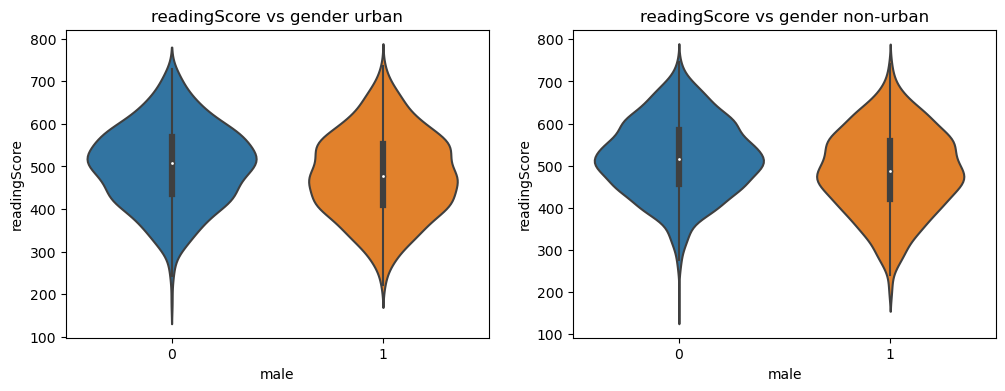

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.violinplot(x='male', y='readingScore', data=df_urban, ax=axs[0])
axs[0].set_title('readingScore vs gender urban')

sns.violinplot(x='male', y='readingScore', data=df_rural, ax=axs[1])
axs[1].set_title('readingScore vs gender non-urban')

# ### Notice that the non-urban distribution is much more balenced  

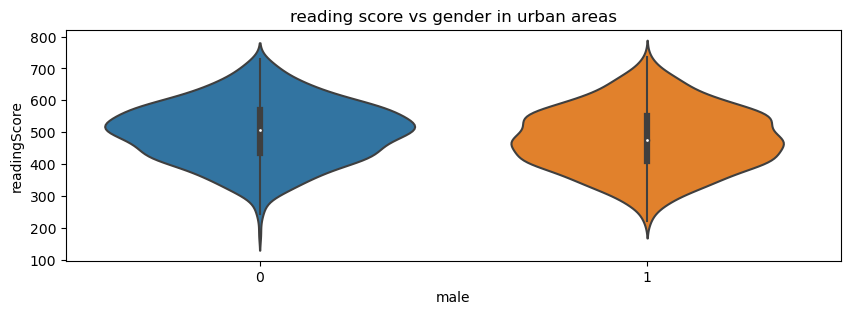

In [60]:
plt.figure(figsize=(10, 3))
ax = sns.violinplot(x='male', y='readingScore', data=df_urban)
ax.set_title('reading score vs gender in urban areas')
plt.show()

# ### This indicates that males (1) have a lower reading score than females in urban areas

# ### Reccomendations: 

# ### Looking at the data, we have found that urban and non-urban areas have significantly different reading scores. Urban areas tend to have lower reading scores, and the difference was found to be statistically significant. 

# ### Particularly, scores among males in Urban areas were significantly lower than females in these areas. This tells us that male students in urban areas are facing significant difficulties in education. This makes sense, and lines up with current common notion that urban schools are suffering

# ### More money should be spent on Urban schools, particularly in poorer urban neighborhoods. In urban areas, poorer neighborhoods face more significant challenges to school attendence and performance, such as crime and trouble at home. Students in impoverished urban areas should be given additional attention and funding. This could lead to a wealth of modifications of different types, such as additional police presence in these neighborhoods. More crossing guards, as well as metal detectors and armed guards at schools, may help different situations. 

# ### A variety of after school programs could help encourage education in these areas, such as: 
## - STEM club, teaching kids about science and math
## - Videogames Club, encouraging students to play videogames and stay in school
## - Band / Musician Club, encouraging students to have the hobby of performing music for fun


# ### Programs to specifically encourage male students in urban environments would be particularly beneficial. 

# ### Perhaps one reasonable solution would be to bus students from Urban areas to sports and after school programs at different schools outside of the Urban environment. This would encourage students to participate in after school programs to stay out of trouble. Students could put their full athletic profile on college resumes, such as stating that they went to Compton West High School but played on the Beverly Hills High School Football Team.  

